**Import the libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [4]:
df = pd.read_csv("teleCust.csv")

In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Familiarizing with the dataset**

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("-----------------------------------")

region
3    344
2    334
1    322
Name: count, dtype: int64
-----------------------------------
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
-----------------------------------
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
-----------------------------------
marital
0    505
1    495
Name: count, dtype: int64
-----------------------------------
address
1     68
2     66
4   

In [8]:
columns_to_drop = ["ed", "employ"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [9]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


In [11]:
df.isnull().value_counts()

region  tenure  age    marital  address  income  retire  gender  reside  custcat
False   False   False  False    False    False   False   False   False   False      1000
Name: count, dtype: int64

**EDA**

*Determine the correlation between the heatmap and the variables*

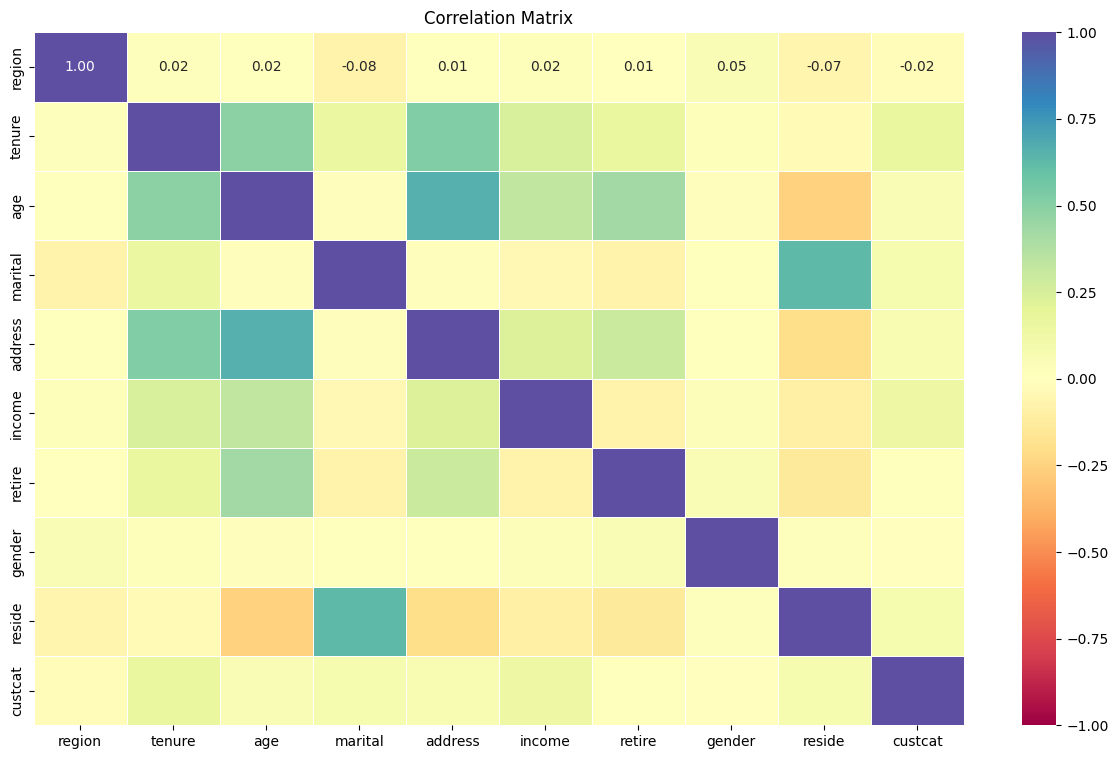

In [14]:
plt.figure(figsize = (15,9))
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt=".2f", linewidth=0.5, cmap="Spectral", vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()


In [15]:
correlation

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,-0.083651,0.038706,-0.097591,0.134525
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.053906,1.000000,0.016556,-0.004966
reside,-0.065158,-0.036592,-0.254993,0.625999,-0.201645,-0.097591,-0.140120,0.016556,1.000000,0.082022
custcat,-0.023771,0.166691,0.056909,0.083836,0.067913,0.134525,0.008908,-0.004966,0.082022,1.000000


In [16]:
columns_to_drop = ["retire", "gender"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [17]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [18]:
region_dummy = pd.get_dummies(df.region, drop_first=True, prefix = "region")
reside_dummy = pd.get_dummies(df.reside, drop_first=True, prefix = "reside")

In [19]:
# Drop the region and reside parameters from the df
columns_to_drop = ["reside", "region"]
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [20]:
#Add the dummy variables to the df using the concat() function
df = pd.concat([df, region_dummy, reside_dummy], axis = 1)

In [21]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


*Standardization of variables*

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#Determine which varaibles to standardize
scaled_variable = df[["tenure", "age", "address", "income"]]

In [25]:
scaled_variable

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


In [26]:
scaler = StandardScaler()

In [27]:
#Standardize the data
scaler.fit(scaled_variable)

StandardScaler()

In [28]:
#Transform the data
#The scaler object has already learnt standardization
scaled_variable = scaler.transform(scaled_variable)

In [29]:
scaled_variable.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
df_scaled = pd.DataFrame(scaled_variable, columns = ["tenure", "age", "address", "income"])

In [ ]:
df_scaled.head()

In [32]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


In [ ]:
columns_to_drop = ["tenure", "age", "address", "income"]

In [ ]:
df.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
#Join the 2 dfs
df = pd.concat([df, df_scaled], axis = 1)

In [ ]:
df.head(10)

**KNN MODELLING**

In [45]:
X = df.drop(["custcat"], axis = 1)
y = df["custcat"]

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
#random_state=42: This parameter ensures reproducibility. By setting a seed value (42 in this case), the split will be the same every time you run the code, allowing for consistent results.

In [51]:
#Visualize the divisions
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 14) (800,)
Test set: (200, 14) (200,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [62]:
#Test the model
y_pred = knn_model.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Score:  0.3


In [66]:
k = 6
knn_model2 = KNeighborsClassifier(n_neighbors = k)
knn_model2.fit(X_train, y_train)
knn_model2

KNeighborsClassifier(n_neighbors=6)

In [68]:
#Test the model
y_pred = knn_model2.predict(X_test)

In [70]:
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Score:  0.34
